In [1]:
from litellm import completion
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import json

D:\Documents\anaconda3\envs\new_sandbox\Lib\site-packages\pydantic\_internal\_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


In [2]:
df_all = pd.read_csv('C:/Users/Sviat/Downloads/AIME_Dataset_1983_2024.csv')
df_all.info

<bound method DataFrame.info of              ID  Year  Problem Number  \
0        1983-1  1983               1   
1        1983-2  1983               2   
2        1983-3  1983               3   
3        1983-4  1983               4   
4        1983-5  1983               5   
..          ...   ...             ...   
928  2024-II-11  2024              11   
929  2024-II-12  2024              12   
930  2024-II-13  2024              13   
931  2024-II-14  2024              14   
932  2024-II-15  2024              15   

                                              Question Answer Part  
0    Let $x$ , $y$ and $z$ all exceed $1$ and let $...     60  NaN  
1    Let $f(x)=|x-p|+|x-15|+|x-p-15|$ , where $0 < ...     15  NaN  
2    What is the product of the real roots of the e...     20  NaN  
3    A machine-shop cutting tool has the shape of a...     26  NaN  
4    Suppose that the sum of the squares of two com...      4  NaN  
..                                                 ...    ...

In [3]:
with open('data/deepscaler.json') as f:
    data = json.load(f)
scaler_df = pd.DataFrame(data)

questions = list(scaler_df.problem)
df_all = df_all.query('Question != @questions')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 0 to 932
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              789 non-null    object
 1   Year            789 non-null    int64 
 2   Problem Number  789 non-null    int64 
 3   Question        789 non-null    object
 4   Answer          789 non-null    object
 5   Part            597 non-null    object
dtypes: int64(2), object(4)
memory usage: 43.1+ KB


C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\2405528216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Decade'] = pd.cut(df_all['Year'], [1980, 1990, 2000, 2010, 2020, 2030], labels = [1980, 1990, 2000, 2010, 2020])


<Axes: >

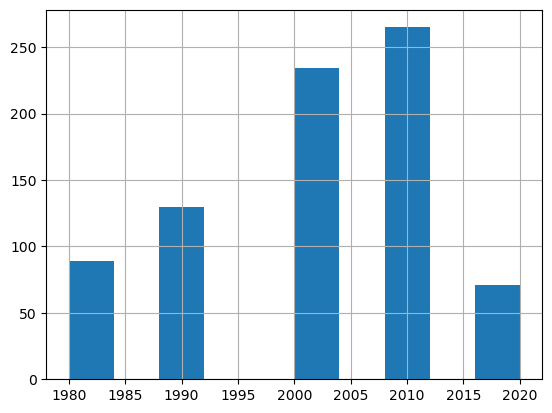

In [4]:
df_all['Decade'] = pd.cut(df_all['Year'], [1980, 1990, 2000, 2010, 2020, 2030], labels = [1980, 1990, 2000, 2010, 2020])
df_all['Decade'].hist()

In [5]:
groups = []
N_q = 50
for cat in [1980, 1990, 2000, 2010, 2020]:
    groups += [df_all.query(f'Decade == {cat}').sample(N_q, random_state=42)]
df = pd.concat(groups, ignore_index=True)
df

C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\491235045.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  groups += [df_all.query(f'Decade == {cat}').sample(N_q, random_state=42)]
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\491235045.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  groups += [df_all.query(f'Decade == {cat}').sample(N_q, random_state=42)]
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\491235045.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  groups += [df_all.query(f'Decade == {cat}').sample(N_q, random_state=42)]
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\491235045.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr 

,ID,Year,Problem Number,Question,Answer,Part,Decade
0,1986-5,1986,5,What is that largest positive integer $n$ for ...,890,NaN,1980
1,1987-2,1987,2,What is the largest possible distance between ...,137,NaN,1980
2,1985-3,1985,3,"Find $c$ if $a$ , $b$ , and $c$ are positive i...",198,NaN,1980
3,1983-13,1983,13,"For $\{1, 2, 3, \ldots, n\}$ and each of its n...",448,NaN,1980
4,1986-11,1986,11,The polynomial $1-x+x^2-x^3+\cdots+x^{16}-x^{1...,816,NaN,1980
...,...,...,...,...,...,...,...
245,2024-II-14,2024,14,Let $b \geq 2$ be an integer. Call a positive ...,211,II,2020
246,2021-II-6,2021,6,"For any finite set $S$ , let $|S|$ denote the ...",454,II,2020
247,2022-I-5,2022,5,A straight river that is $264$ meters wide flo...,550,I,2020
248,2022-II-11,2022,11,Let $ABCD$ be a convex quadrilateral with $AB=...,180,II,2020


In [6]:
def cast_int(row):
    try:
        return int(row)
    except Exception:
        print(row)
        return int(row.split(' ')[0])
df['int_answer'] = df['Answer'].apply(cast_int)

080 or 081 (both were accepted)


<Axes: >

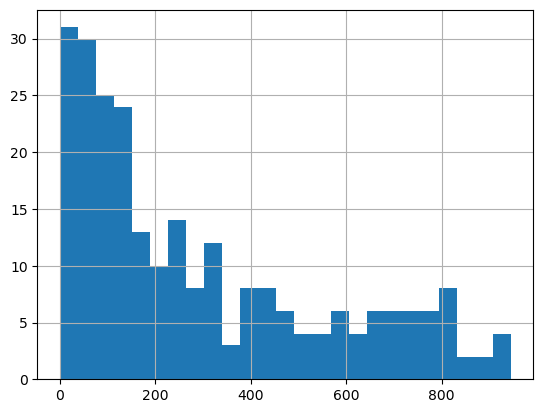

In [7]:
df['int_answer'].hist(bins=25)

In [142]:
def get_reply(question, model_name = "ollama/llama3.1:8b", system_prompt='', extra= ' Return answer modulo 1000 and put it in \\boxed{}.', num_predict=18000):
    text = question + extra
    messages = []
    if system_prompt:
        messages += [{ "content": system_prompt,"role": "system"}]
    messages += [{ "content": text, "role": "user"}]
    response = completion(
        model=model_name, 
        messages=messages, 
        timeout=7200,
        num_predict=num_predict
    )
    answer = (response.choices[-1].message.content)
    reason = 'good'
    if response.usage.total_tokens >= num_predict:
        reason = 'limit'
    return answer, reason
def get_answer(question, model_name = "ollama/llama3.1:8b", system_prompt='', extra= ' Return answer modulo 1000 and put it in \\boxed{}.'):
    answer, reason= get_reply(question, model_name = model_name, system_prompt=system_prompt, extra=extra)
    result = answer.split('\\boxed{')[-1].split('}')[0]
    body = answer.split('</think>')[-1]
    try:
        return int(result), reason, body
    except Exception:
        if reason == 'good':
            reason = 'cast_fail'
        if reason == 'limit':
            body == body.split('\n')[-1]
        return np.nan, reason, body
i = -3
print(df['Question'].values[i], df['Answer'].values[i])
#get_answer(df['Question'].values[i], 'ollama/deepscaler:1.5b-preview-q8_0')
get_answer(df['Question'].values[i], 'ollama/marco-o1')

A straight river that is $264$ meters wide flows from west to east at a rate of $14$ meters per minute. Melanie and Sherry sit on the south bank of the river with Melanie a distance of $D$ meters downstream from Sherry. Relative to the water, Melanie swims at $80$ meters per minute, and Sherry swims at $60$ meters per minute. At the same time, Melanie and Sherry begin swimming in straight lines to a point on the north bank of the river that is equidistant from their starting positions. The two women arrive at this point simultaneously. Find $D.$ 550


(nan,
 'limit',
 '<Thought>\nAlright, I need to solve this problem involving Melanie and Sherry swimming across a moving river. Let\'s break down the information given:\n\n- **River Details**:\n  - Width: 264 meters (from south bank to north bank).\n  - Flowing from west to east at 14 meters per minute.\n\n- **Swimmers\' Details**:\n  - Melanie is swimming downstream relative to the water, so her velocity relative to the ground is influenced by both her swimming speed and the river\'s current.\n  - Sherry is also swimming upstream relative to the water, similarly affected by the river\'s current but in the opposite direction.\n\n- **Swimming Speeds**:\n  - Melanie swims at 80 meters per minute.\n  - Sherry swims at 60 meters per minute.\n\n- **Distance Between Them Initially**:\n  - Melanie is D meters downstream from Sherry on the south bank.\n\n- **Objective**:\n  - Both women swim to a point on the north bank that\'s equidistant from their starting positions and arrive simultaneousl

In [140]:
i = 2
print(df['Question'].values[i], df['Answer'].values[i])


Find $c$ if $a$ , $b$ , and $c$ are positive integers which satisfy $c=(a + bi)^3 - 107i$ , where $i^2 = -1$ . 198


In [10]:
def scramble(question, model_name = "ollama/llama3.2:3b-instruct-q8_0"):
    system_prompt='''You are an expert linguist that helps people to conduct exams. 
    When task is given to you, you do not solve the task, but you change its text such that the meaning is preserved, but the text reads differently. 
    You can occasionally replace nouns and verbs with synonyms and change the order of the words in the task, but following the grammar and preserving the meaning of the task.  

    If the task contains equations, you should never change the number values!
    Do not add extra statements!
    You modify equations such their results will be unchanged: for example, you can exchange left and right part of the equation, change the order of the terms in the summation or multiplication.
    Use \\boxed{} to return the modified text only.
    '''
    extra = ''
    text = f'Task text: """{question}""". Modify the task text, such that its meaning is unchanged. Return the modified text in \\boxed{{}}'
    answer = get_reply(text, model_name=model_name, system_prompt=system_prompt, extra=extra)
    result = answer.split('\\boxed{')[-1].strip('$').strip('}')#.split('}')[-1]
    return result
#modified = scramble(df['Question'].values[i])
#print(modified)

In [11]:
#get_answer(modified, 'ollama/hf.co/bartowski/agentica-org_DeepScaleR-1.5B-Preview-GGUF:F16')

In [143]:
#model =  "ollama/llama3.1:8b"
#model =  "ollama/deepseek-r1:8b"
model =  'ollama/deepscaler:1.5b-preview-q8_0'
results = []
statuses = []
bodies = []
for question in tqdm(df['Question'].values):
    answer, reason, body = get_answer(question, model)
    results += [answer]
    statuses += [reason]
    bodies += [body]
df['results_scaler'] = results
df['status_scaler'] = statuses
df['body_scaler'] = bodies


100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [5:08:07<00:00, 73.95s/it]


In [85]:
model =  "ollama/deepseek-r1:8b"
results = []
statuses = []
for question in tqdm(df['Question'].values):
    answer, reason, body = get_answer(question, model)
    results += [answer]
    statuses += [reason]
    bodies += [body]
df['results_seek8'] = results
df['status_seek8'] = statuses
df['body_seek8'] = bodies


100%|████████████████████████████████████████████████████████████████████████████| 250/250 [13:00:53<00:00, 187.42s/it]


In [ ]:
#model =  "ollama/llama3.1:8b"
#model =  "ollama/deepseek-r1:8b"
model =  "ollama/deepseek-r1:1.5b-qwen-distill-q8_0"
#model =  'ollama/hf.co/bartowski/agentica-org_DeepScaleR-1.5B-Preview-GGUF:F16'
results = []
statuses = []
bodies = []
for question in tqdm(df['Question'].values):
    answer, reason, body = get_answer(question, model)
    results += [answer]
    statuses += [reason]
    bodies += [body]
df['results_seek'] = results
df['status_seek'] = statuses
df['body_seek'] = bodies


 71%|█████████████████████████████████████████████████████▍                     | 178/250 [4:36:42<2:39:46, 133.15s/it]

In [55]:
model =  "ollama/llama3.1:8b"
#model =  "ollama/deepseek-r1:8b"
#model =  'ollama/hf.co/bartowski/agentica-org_DeepScaleR-1.5B-Preview-GGUF:F16'
results = []
statuses = []
bodies = []
for question in tqdm(df['Question'].values):
    answer, reason, body = get_answer(question, model)
    results += [answer]
    statuses += [reason]
    bodies += [body]
df['results_llama'] = results
df['status_llama'] = statuses
df['body_llama'] = bodies


100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:05:22<00:00, 15.69s/it]


In [66]:
results, statuses

([890, 137, 198, nan, nan, 60, nan, nan, 5, 160, 4, nan, 337],
 ['good',
  'good',
  'good',
  'limit',
  'limit',
  'good',
  'cast_fail',
  'cast_fail',
  'good',
  'good',
  'good',
  'limit',
  'good'])

In [99]:
len(df.query('results_scaler == results_scaler and Decade == 2020'))

C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\2154739605.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  len(df.query('results_scaler == results_scaler and Decade == 2020'))


20

In [133]:
df.query('Decade==2020')[['int_answer','results_scaler',	'results_llama'	, 'results_seek8',]]

C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\1232352150.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df.query('Decade==2020')[['int_answer','results_scaler',	'results_llama'	, 'results_seek8',]]


,int_answer,results_scaler,results_llama,results_seek8
200,797,NaN,764.0,NaN
201,97,NaN,275.0,NaN
202,944,5.0,50.0,NaN
203,57,0.0,6.0,400.0
204,24,NaN,49.0,1.0
205,295,2.0,493.0,NaN
206,285,NaN,0.0,NaN
207,125,NaN,23.0,NaN
208,191,50.0,327.0,240.0
209,336,NaN,420.0,NaN


C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\993552582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correct_counts_scaler = df.query(f'results_{name} == int_answer').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\993552582.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_scaler = df.query(f'status_{name} != "limit"').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\993552582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obse

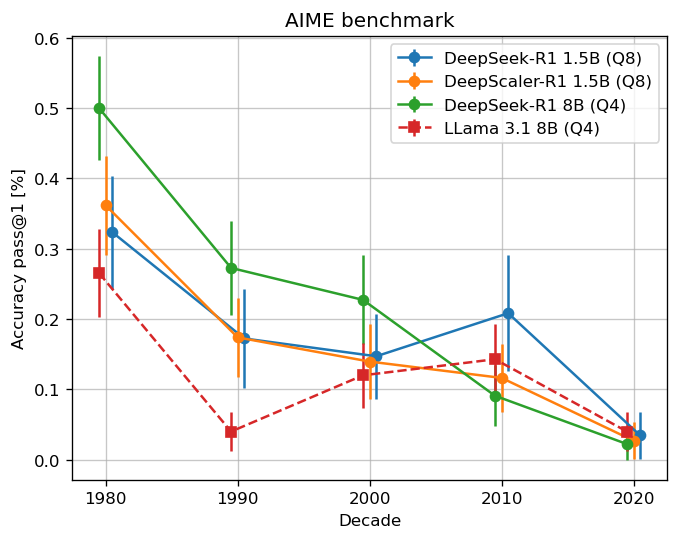

In [123]:
def get_data(df, name):
    correct_counts_scaler = df.query(f'results_{name} == int_answer').groupby('Decade')['int_answer'].count()
    total_scaler = df.query(f'status_{name} != "limit"').groupby('Decade')['int_answer'].count()
    e_scaler = correct_counts_scaler/total_scaler
    err_scaler = np.sqrt(e_scaler *(1-e_scaler)/ total_scaler)
    #err_scaler = np.sqrt(e_scaler)
    return e_scaler, err_scaler

fig, ax = plt.subplots(1,1, dpi=120)

e_scaler, err_scaler = get_data(df, 'scaler')
e_llama, err_llama = get_data(df, 'llama')
e_deep8, err_deep8 = get_data(df, 'seek8')
e_deep, err_deep = get_data(df, 'seek')
factor=1
x_arr = np.array(df['Decade'].unique())
ax.errorbar(x_arr+0.5, e_deep*factor, yerr=err_deep*factor, fmt='-o', label='DeepSeek-R1 1.5B (Q8)')
ax.errorbar(x_arr, e_scaler*factor, yerr=err_scaler*factor, fmt='-o', label='DeepScaler-R1 1.5B (Q8)')
ax.errorbar(x_arr-0.5, e_deep8*factor, yerr=err_deep8*factor, fmt='-o', label='DeepSeek-R1 8B (Q4)')
ax.errorbar(x_arr-0.5, e_llama*factor, yerr=err_llama*factor, fmt='--s', label='LLama 3.1 8B (Q4)')
ax.set_xticks(df['Decade'].unique(), df['Decade'].unique())
ax.set_ylabel('Accuracy pass@1 [%]')
ax.legend()
ax.grid(alpha=0.7)
ax.set_title('AIME benchmark')
ax.set_xlabel('Decade');

C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\733773655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_counts_deep = df.query('status_scaler == "limit"').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\733773655.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_counts_llama = df.query('status_llama == "limit"').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\733773655.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

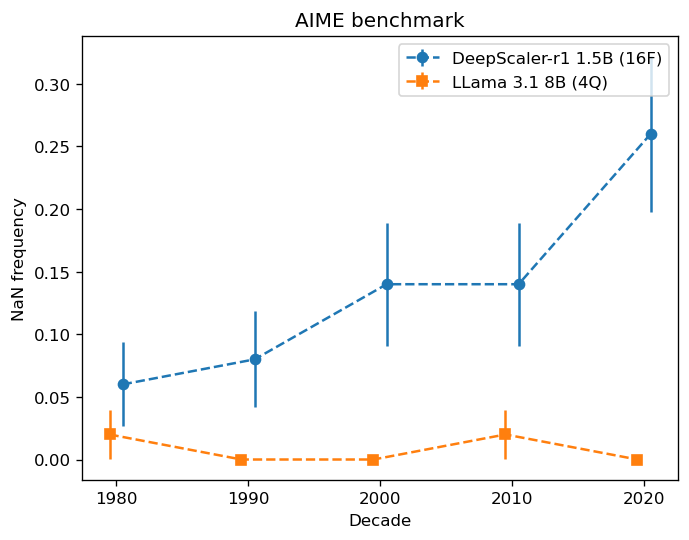

In [58]:
fig, ax = plt.subplots(1,1, dpi=120)
nan_counts_deep = df.query('status_scaler = "limit"').groupby('Decade')['int_answer'].count()
nan_counts_llama = df.query('status_llama == "limit"').groupby('Decade')['int_answer'].count()
total = df.groupby('Decade')['int_answer'].count()
err_nan_deep = np.sqrt(nan_counts_deep/total *(1-nan_counts_deep/total)/ total)
err_nan_llama = np.sqrt(nan_counts_llama/total *(1-nan_counts_llama/total)/ total)
x_arr = np.array(df['Decade'].unique())
ax.errorbar(x_arr+0.5, nan_counts_deep/total, yerr=err_nan_deep, fmt='--o', label='DeepScaler-r1 1.5B (Q8)')
ax.errorbar(x_arr-0.5, nan_counts_llama/total, yerr=err_nan_llama, fmt='--s', label='LLama 3.1 8B (4Q)')
ax.set_xticks(df['Decade'].unique(), df['Decade'].unique())
ax.set_ylabel('NaN frequency')
ax.legend()
ax.set_title('AIME benchmark')
ax.set_xlabel('Decade');

C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\2021014326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_counts_deep = df.query('status_scaler == "cast_fail"').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\2021014326.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_counts_llama = df.query('status_llama == "cast_fail"').groupby('Decade')['int_answer'].count()
C:\Users\Sviat\AppData\Local\Temp\ipykernel_14672\2021014326.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

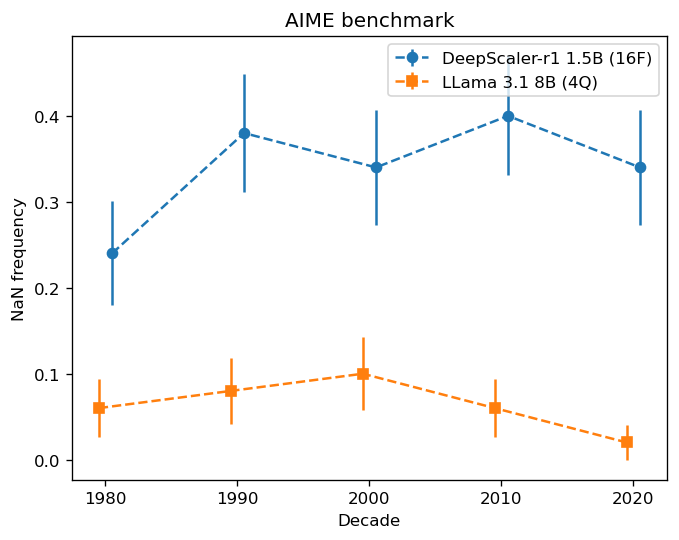

In [59]:
fig, ax = plt.subplots(1,1, dpi=120)
nan_counts_deep = df.query('status_scaler == "cast_fail"').groupby('Decade')['int_answer'].count()
nan_counts_llama = df.query('status_llama == "cast_fail"').groupby('Decade')['int_answer'].count()
total = df.groupby('Decade')['int_answer'].count()
err_nan_deep = np.sqrt(nan_counts_deep/total *(1-nan_counts_deep/total)/ total)
err_nan_llama = np.sqrt(nan_counts_llama/total *(1-nan_counts_llama/total)/ total)
x_arr = np.array(df['Decade'].unique())
ax.errorbar(x_arr+0.5, nan_counts_deep/total, yerr=err_nan_deep, fmt='--o', label='DeepScaler-r1 1.5B (16F)')
ax.errorbar(x_arr-0.5, nan_counts_llama/total, yerr=err_nan_llama, fmt='--s', label='LLama 3.1 8B (4Q)')
ax.set_xticks(df['Decade'].unique(), df['Decade'].unique())
ax.set_ylabel('NaN frequency')
ax.legend()
ax.set_title('AIME benchmark')
ax.set_xlabel('Decade');

In [124]:
df.to_csv('data/tmp3.csv',index=None)

In [ ]:
plt.scatter(np.array(results) , df['int_answer'].values[:len(results)], )
plt.xlim(0,1000);
plt.xlabel('LLM output')
plt.ylabel('True answer');

In [ ]:
np.sum(pd.isna(results))

In [ ]:
deep_corr = np.sum(np.array(results) == df['int_answer'].values[:len(results)])
print('Total DeepSeek:', deep_corr, len(results), deep_corr/len(results),  deep_corr/np.sum(pd.isna(results)))

In [ ]:
llama_corr = np.sum(np.array(llama_results) == df['int_answer'].values[:len(llama_results)])
print('Total LLama:', llama_corr, llama_corr/len(llama_results), llama_corr/np.sum(pd.isna(llama_results)))

In [ ]:
llama_results = list(results)

In [ ]:
merged = ('\n'.join(df.sort_values('Year', ascending=True)['Question']))

text = f'I have a long list of questions that you need to analyse: \n """{merged}"""\n\nEvery line represents one distinct and independent question.\nIs there a trend of difficulty here? Is it increasing or decreasing?'
print(get_reply(text, model_name='ollama/phi4'))

In [ ]:
print(text)